<br><br><br>

<center><img src="img/numpy-logo.png" width="30%"></center>

<br><br><br>

In [44]:
# Fundamental data type: Numpy array
import numpy, uproot
print(numpy.arange(20), end="\n\n")
print(numpy.linspace(-5, 5, 21), end="\n\n")
print(numpy.empty(10000, numpy.float16), end="\n\n")
print(numpy.full((2, 7), 999), end="\n\n")
print(numpy.random.normal(-1, 0.0001, 10000), end="\n\n")
print(uproot.open("data/Zmumu.root")["events"]["E1"].array())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]

[-6.199e-05 -3.799e-01        nan ... -2.920e-01  3.323e-01 -1.752e+00]

[[999 999 999 999 999 999 999]
 [999 999 999 999 999 999 999]]

[-1.0000768  -0.99993585 -0.99995632 ... -0.99995043 -1.00000071
 -0.99985817]

[82.20186639 62.34492895 62.34492895 ... 81.27013558 81.27013558
 81.56621735]


<br><br>

<center><img src="img/numpy-memory-layout.png" width="90%"></center>

<br><br>

In [3]:
a = numpy.array([2**30, 2**30 + 2**26, -1, 0, 2**30 + 2**24, 2**30 + 2**20], numpy.int32)
# a = a.view(numpy.float32)
# a = a.reshape((2, 3))

print("data:\n", a, end="\n\n")
print("type:", type(a), end="\n\n")
print("dtype (type of the data it contains):", a.dtype, end="\n\n")
print("shape: (size of each dimension):", a.shape, end="\n\n")

data:
 [1073741824 1140850688         -1          0 1090519040 1074790400]

type: <class 'numpy.ndarray'>

dtype (type of the data it contains): int32

shape: (size of each dimension): (6,)



In [45]:
# Any mathematical function that would map scalar arguments to a scalar result
#                                      maps array arguments to an array result.

a_array = numpy.random.uniform(5, 10, 10000);     a_scalar = a_array[0]
b_array = numpy.random.uniform(10, 20, 10000);    b_scalar = b_array[0]
c_array = numpy.random.uniform(-0.1, 0.1, 10000); c_scalar = c_array[0]

def quadratic_formula(a, b, c):
    return (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

print("scalar:\n", quadratic_formula(a_scalar, b_scalar, c_scalar), end="\n\n")
print("array:\n", quadratic_formula(a_array,  b_array,  c_array), end="\n\n")

scalar:
 -0.006103779006261416

array:
 [-0.00610378 -0.00325014  0.00168913 ...  0.00332879  0.00297344
 -0.00076656]



In [7]:
# Order of operations is column at a time.

a, b, c = a_array, b_array, c_array

roots1 = (-b + numpy.sqrt(b**2 - 4*a*c)) / (2*a)

tmp1 = numpy.negative(b)            # -b
tmp2 = numpy.square(b)              # b**2
tmp3 = numpy.multiply(4, a)         # 4*a
tmp4 = numpy.multiply(tmp3, c)      # tmp3*c
tmp5 = numpy.subtract(tmp2, tmp4)   # tmp2 - tmp4
tmp6 = numpy.sqrt(tmp5)             # sqrt(tmp5)
tmp7 = numpy.add(tmp1, tmp6)        # tmp1 + tmp6
tmp8 = numpy.multiply(2, a)         # 2*a
roots2 = numpy.divide(tmp7, tmp8)   # tmp7 / tmp8

roots1, roots2

(array([ 0.00496327,  0.00707392, -0.00071447, ...,  0.00027547,
        -0.00507138,  0.0011779 ]),
 array([ 0.00496327,  0.00707392, -0.00071447, ...,  0.00027547,
        -0.00507138,  0.0011779 ]))

In [8]:
# Even comparison operators apply element by element.

roots1 == roots2

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
# So use a reducer (sum, max, min, any, all) to turn the array into a scalar.

(roots1 == roots2).all()

True

In [17]:
# Reduce along axes...

block = numpy.ones((7, 13), dtype=int)
print(block)

block.sum(axis=0)

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]


array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

<br><br>

<center><img src="img/numpy-memory-broadcasting.png" width="75%"></center>

<br><br>

In [22]:
E, px, py, pz = uproot.open("data/Zmumu.root")["events"].arrays(["E1", "p[xyz]1"], outputtype=tuple)

#                   array   array   array   scalar
energy = numpy.sqrt(px**2 + py**2 + pz**2 + 0.1056583745**2)
energy, E

(array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]),
 array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
        81.27013558, 81.56621735]))

<br><br><br><br><br>

# Numpy slicing

<br><br><br><br><br>

In [122]:
# Basic array slicing is the same as Python list slicing

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

for expr in "a[3]      ", "a[3:]     ", "a[:3]     ", "a[3:7]    ", "a[3:7:2]  ", "a[::2]    ":
    print(expr, "=", eval(expr))

print()
for expr in "a[-3]     ", "a[-3:]    ", "a[:-3]    ", "a[-7:-3]  ", "a[-7:-3:2]", "a[::-1]   ":
    print(expr, "=", eval(expr))

a[3]       = 3.3
a[3:]      = [3.3 4.4 5.5 6.6 7.7 8.8 9.9]
a[:3]      = [0.  1.1 2.2]
a[3:7]     = [3.3 4.4 5.5 6.6]
a[3:7:2]   = [3.3 5.5]
a[::2]     = [0.  2.2 4.4 6.6 8.8]

a[-3]      = 7.7
a[-3:]     = [7.7 8.8 9.9]
a[:-3]     = [0.  1.1 2.2 3.3 4.4 5.5 6.6]
a[-7:-3]   = [3.3 4.4 5.5 6.6]
a[-7:-3:2] = [3.3 5.5]
a[::-1]    = [9.9 8.8 7.7 6.6 5.5 4.4 3.3 2.2 1.1 0. ]


In [123]:
# But multidimensional arrays can be sliced with an extension of this syntax.
a = numpy.array([[ 0,  1,  2,  3,  4,  5],
                 [10, 11, 12, 13, 14, 15],
                 [20, 21, 22, 23, 24, 25],
                 [30, 31, 32, 33, 34, 35]])
for expr in "a[2:, 1:]", "a[:, 1:-1]", "a[::2, ::2]", "a[:, 3]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[2:, 1:] =
[[21 22 23 24 25]
 [31 32 33 34 35]]

a[:, 1:-1] =
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]

a[::2, ::2] =
[[ 0  2  4]
 [20 22 24]]

a[:, 3] =
[ 3 13 23 33]



<center><img src="img/numpy-slicing.png" width="40%"></center>

In [124]:
# Exercise: slice "a" so that it is identical to "b"

a = numpy.arange(30).reshape((3, 2, 5))
b = numpy.array([[4, 9], [24, 29]])

asliced = a   # a[?, ?, ?]

print("a[?, ?, ?] =", asliced, sep="\n", end="\n\n")
print("b =", b, sep="\n")

a[?, ?, ?] =
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]

b =
[[ 4  9]
 [24 29]]


In [125]:
# Remember mass[Q1 != Q2]? That was a special case of (advanced) slicing:

a    = numpy.array([  0.0,   1.1,   2.2,   3.3,   4.4,  5.5,   6.6,  7.7,   8.8,  9.9])
mask = numpy.array([False, False, False, False, False, True, False, True, False, True])
#                                                       5.5          7.7          9.9

for expr in "a[mask]", "a < 5", "a[a < 5]":
    print(expr, " =\n", eval(expr), sep="", end="\n\n")

a[mask] =
[5.5 7.7 9.9]

a < 5 =
[ True  True  True  True  True False False False False False]

a[a < 5] =
[0.  1.1 2.2 3.3 4.4]



dict_keys(['Type', 'Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'])


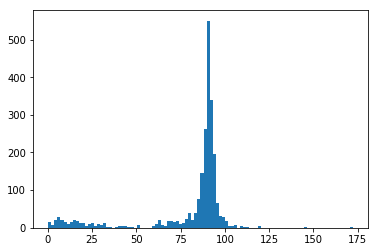

In [28]:
# Exercise: plot masses with (1) opposite charges and (2) both muon abs(eta) < 1
# https://en.wikipedia.org/wiki/Pseudorapidity

arrays = uproot.open("data/Zmumu.root")["events"].arrays(namedecode="utf-8")
print(arrays.keys())
for n in arrays:
    exec(f"{n} = arrays['{n}']")

%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.hist(M, bins=100);

In [130]:
# Arrays of integers can also be used as indexes.

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

print("selects elements, possibly out of order")
index = numpy.array([3, 5, 0, 9])
print("a[[3, 5, 0, 9]] =", a[index])

print("\nmay use negative indexing, just like single integers and slices")
index = numpy.array([3, 5, 0, -1, -2, -3])
print("a[[3, 5, 0, -1, -2, -3]] =", a[index])

print("\nmay include repetitions(!)")
index = numpy.array([3, 5, 0, 9, 9, 9, 3, 5, 0])
print("a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] =", a[index])

selects elements, possibly out of order
a[[3, 5, 0, 9]] = [3.3 5.5 0.  9.9]

may use negative indexing, just like single integers and slices
a[[3, 5, 0, -1, -2, -3]] = [3.3 5.5 0.  9.9 8.8 7.7]

may include repetitions(!)
a[[3, 5, 0, 9, 9, 9, 3, 5, 0]] = [3.3 5.5 0.  9.9 9.9 9.9 3.3 5.5 0. ]


In [131]:
# What is integer indexing good for?

permutation = etaZ.argsort()                            # try also abs(etaZ).argsort()

print(f"\n\npermutation:\n{permutation}")

print(f"\n\nsorted etaZ:\n{etaZ[permutation]}")

print(f"\n\nmasses sorted by etaZ:\n{masses[permutation]}")



permutation:
[ 594   71 1447 ...  564  561 1332]


sorted etaZ:
[-2.20861271 -2.15576398 -2.06939557 ...  2.09490763  2.09549142
  2.23921074]


masses sorted by etaZ:
[1.38595961 0.61617839 6.70683147 ... 1.31566591 1.32027808 1.75907992]


In [132]:
# Exercise: dense array → sparse array → dense array.

dense1 = numpy.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 4, 1, 0, 3, 0,
                      1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) * 1.1

sparse_indexes = numpy.nonzero(dense1)[0]
sparse_values  = dense1[sparse_indexes]
print("sparse indexes:", sparse_indexes, "\nsparse values: ", sparse_values)

dense2 = numpy.zeros(len(dense1))
# dense2[???] = ???                       # what do you need to put on this line
print("dense:", dense1, sep="\n")         # to get dense2 == dense1 printed on this line?

sparse indexes: [37 38 40 45 46 48 50 51 53 58] 
sparse values:  [1.1 2.2 1.1 4.4 1.1 3.3 1.1 2.2 1.1 1.1]
dense:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.1 2.2 0.  1.1 0.  0.  0.  0.  4.4 1.1 0.  3.3 0.  1.1 2.2 0.  1.1
 0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [133]:
# Just as masking with booleans is a generalization of slicing...

def slice2mask(a, s):
    start, stop, step = s.indices(len(a))
    if step > 0:
        return numpy.array([start <= i < stop and (i - start) % step == 0 for i in range(len(a))])
    else:
        raise ValueError("masking is only a generalization of slices with positive steps")

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

s = slice(3, None, 2)   # equivalent to [3::2]

mask = slice2mask(a, s)

print("mask    =", mask)
print("a[s]    =", a[s])
print("a[mask] =", a[mask])

mask    = [False False False  True False  True False  True False  True]
a[s]    = [3.3 5.5 7.7 9.9]
a[mask] = [3.3 5.5 7.7 9.9]


In [134]:
# ...indexing with integers is a generalization of masking.

def mask2index(mask):
    return numpy.nonzero(mask)[0]

a = numpy.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

mask = [False, False, False, True, False, True, False, True, False, True]

index = mask2index(mask)

print("index    =", index)
print("a[mask]  =", a[mask])
print("a[index] =", a[index])

index    = [3 5 7 9]
a[mask]  = [3.3 5.5 7.7 9.9]
a[index] = [3.3 5.5 7.7 9.9]


In [135]:
# Indexing with integers is also like composing functions of integers from 0 up to array length.

def f(x):
    return x**2 - 5*x + 10                              # some non-negative function

def g(y):
    return max(0, 2*y - 10) + 3                         # another non-negative function

F   = numpy.array([f(i) for i in numpy.arange(10)])     # sample f at 10 elements
G   = numpy.array([g(i) for i in numpy.arange(100)])    # sample g at enough elements to include max(f)
GoF = numpy.array([g(f(i)) for i in numpy.arange(10)])  # sample g∘f at 10 elements

print("G\u2218F =", G[F])
print("g\u2218f =", GoF)

G∘F = [13  5  3  3  5 13 25 41 61 85]
g∘f = [13  5  3  3  5 13 25 41 61 85]


In [136]:
# Integer indexing is surprisingly versatile: consider this text corpous (removing punctuation).

text = """Four score and seven years ago our fathers brought forth on this continent, a new nation,
conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and
so dedicated, can long endure. We are met on a great battle-field of that war. We have come to
dedicate a portion of that field, as a final resting place for those who here gave their lives that
that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The
brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add
or detract. The world will little note, nor long remember what we say here, but it can never forget
what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which
they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the
great task remaining before us—that from these honored dead we take increased devotion to that cause
for which they gave the last full measure of devotion—that we here highly resolve that these dead
shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that
government of the people, by the people, for the people, shall not perish from the earth."""

words = text.replace(".", " ").replace(",", " ").replace("-", " ").replace("\u2014", " ").split()

In [137]:
# Dictionary encoding: for compression or textual analysis (e.g. with machine learning).

words = numpy.array(words)
dictionary, index = numpy.unique(words, return_inverse=True)

print("len(words) =", len(words), "\nwords[:25] =\n" + str(words[:25]))
print("\nlen(dictionary) =", len(dictionary), "\ndictionary[:25] =\n" + str(dictionary[:25]))
print("\nlen(index) =", len(index), "\nindex[:25] =\n" + str(index[:25]))

len(words) = 272 
words[:25] =
['Four' 'score' 'and' 'seven' 'years' 'ago' 'our' 'fathers' 'brought'
 'forth' 'on' 'this' 'continent' 'a' 'new' 'nation' 'conceived' 'in'
 'Liberty' 'and' 'dedicated' 'to' 'the' 'proposition' 'that']

len(dictionary) = 142 
dictionary[:25] =
['But' 'Four' 'God' 'It' 'Liberty' 'Now' 'The' 'We' 'a' 'above' 'add'
 'advanced' 'ago' 'all' 'altogether' 'and' 'any' 'are' 'as' 'battle' 'be'
 'before' 'birth' 'brave' 'brought']

len(index) = 272 
index[:25] =
[  1 109  15 111 141  12  94  49  24  55  92 124  34   8  86  84  31  69
   4  15  38 127 120 102 119]


In [138]:
# Restoring a text from its dictionary encoding is just an application of integer indexing.

# index             : positions in corpus → integer codes
# dictionary        : integer codes       → words
# dictionary[index] : positions in corpus → words

dictionary[index]

array(['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers',
       'brought', 'forth', 'on', 'this', 'continent', 'a', 'new',
       'nation', 'conceived', 'in', 'Liberty', 'and', 'dedicated', 'to',
       'the', 'proposition', 'that', 'all', 'men', 'are', 'created',
       'equal', 'Now', 'we', 'are', 'engaged', 'in', 'a', 'great',
       'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or',
       'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated',
       'can', 'long', 'endure', 'We', 'are', 'met', 'on', 'a', 'great',
       'battle', 'field', 'of', 'that', 'war', 'We', 'have', 'come', 'to',
       'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a',
       'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave',
       'their', 'lives', 'that', 'that', 'nation', 'might', 'live', 'It',
       'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we',
       'should', 'do', 'this', 'But', 'in', 'a', 'larger', 'sense', 'we',
     

<br><br>

## Summary of slicing

   * **if X is an integer:** selects individual elements;
   * **if X is a slice:** selects a contiguous or regularly strided subrange (strides can be backward);
   * **if X is a tuple** (any commas between square brackets): applies selections to multiple dimensions;
   * **if X is a boolean array:** filters arbitrarily chosen elements (preserving order);
   * **if X is an integer array:** applies a function of integers, arbitrarily chosen, in any order, and may have duplicates.

<br>

See [Numpy's advanced indexing documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing) for more. (I didn't talk about slicing by a tuple of arrays.)

<br><br><br>

<center><img src="img/pandas-logo.png" width="30%"></center>

<br><br><br>

In [1]:
# Pandas organizes Numpy operations into convenient tables.

df = uproot.open("data/Zmumu.root")["events"].pandas.df()
df

Type     Run      Event          E1        px1        py1         pz1  \
entry                                                                           
0      b'GT'  148031   10507008   82.201866 -41.195288  17.433244  -68.964962   
1      b'TT'  148031   10507008   62.344929  35.118050 -16.570362  -48.775247   
2      b'GT'  148031   10507008   62.344929  35.118050 -16.570362  -48.775247   
3      b'GG'  148031   10507008   60.621875  34.144437 -16.119525  -47.426984   
4      b'GT'  148031  105238546   41.826389  22.783582  15.036444  -31.689894   
5      b'TT'  148031  105238546   48.981407 -19.862307  -9.204225   43.817098   
6      b'GT'  148031  105238546   48.981407 -19.862307  -9.204225   43.817098   
7      b'GG'  148031  105238546   49.760726 -20.177373  -9.354149   44.513955   
8      b'GT'  148031  105485643  132.780755  71.143711  29.542308 -108.150553   
9      b'TT'  148031  105485643   88.078330  51.050486 -51.849400  -49.631328   
10     b'GT'  148031  105485643   88.078330  51.050486 -51.849400  -49.631328   
11     b'GG'  148031  105485643   87.795659  50.870937 -51.669728  -49.502056   
12     b'GT'  148031  105588474   48.619144  44.406988  -3.132003   19.545333   
13     b'TT'  148031  105588474   46.404351 -39.208844  10.779752  -22.356568   
14     b'GT'  148031  105588474   46.404351 -39.208844  10.779752  -22.356568   
15     b'GG'  148031  105588474   46.519913 -39.306485  10.807865  -22.411636   
16     b'GT'  148031  108764385   57.368150  27.249788   3.083568  -50.388830   
17     b'TT'  148031  108764385   80.894157 -42.020547  -5.051576  -68.939166   
18     b'GT'  148031  108764385   80.894157 -42.020547  -5.051576  -68.939166   
19     b'GG'  148031  108764385   81.311450 -42.242553  -5.076551  -69.291673   
20     b'GT'  148031  110875387   79.487794 -27.243260 -23.405122   70.910530   
21     b'TT'  148031  110875387   50.507597  33.674921  29.653424   23.187934   
22     b'GT'  148031  110875387   50.507597  33.674921  29.653424   23.187934   
23     b'GG'  148031  110875387   50.592111  33.728272  29.701482   23.233082   
24     b'GT'  148031   11103650   41.470909  -2.951523 -36.093120  -20.208917   
25     b'TT'  148031   11103650   55.392978   3.996323  40.211907   37.886709   
26     b'GT'  148031   11103650   55.392978   3.996323  40.211907   37.886709   
27     b'GG'  148031   11103650   55.542907   4.007466  40.319935   37.990083   
28     b'GT'  148031  115564751  112.883981  -2.419678 -45.436617 -103.307507   
29     b'TT'  148031  115564751   31.419951  -5.911541  30.099173   -6.804086   
...      ...     ...        ...         ...        ...        ...         ...   
2274   b'GT'  148029   87056751   23.712817  16.962188 -15.219455    6.552776   
2275   b'GG'  148029   87056751   23.684190  16.941295 -15.201413    6.545172   
2276   b'GT'  148029   90130353   66.967245 -56.585255  10.765311  -34.158714   
2277   b'TT'  148029   90130353   33.717409  32.980637  -1.925555   -6.739611   
2278   b'GT'  148029   90130353   33.717409  32.980637  -1.925555   -6.739611   
2279   b'GG'  148029   90130353   33.853678  33.113825  -1.934790   -6.766947   
2280   b'GT'  148029   91605794   42.580187 -36.045090  -8.456551  -21.030915   
2281   b'TT'  148029   91605794   53.526322  36.668310  38.486189    6.269309   
2282   b'GT'  148029   91605794   53.526322  36.668310  38.486189    6.269309   
2283   b'GG'  148029   91605794   53.508055  36.655204  38.472433    6.274452   
2284   b'GT'  148029   92043404   46.432408  22.435607 -22.743227  -33.694904   
2285   b'TT'  148029   92043404   52.581357   4.606652  43.856122   28.639261   
2286   b'GT'  148029   92043404   52.581357   4.606652  43.856122   28.639261   
2287   b'GG'  148029   92043404   52.533500   4.603120  43.818284   28.609906   
2288   b'GT'  148029   95666860   45.205618 -41.878716   2.697471  -16.805758   
2289   b'TT'  148029   95666860   58.235411  47.751704   9.223864  -32.031970   
2290   b'GT'  148029   95666860   58.23

In [116]:
df["mass"] = compute_mass(df.E1, df.E2, df.px1, df.px2, df.py1, df.py2, df.pz1, df.pz2)

df[["mass", "Q1", "Q2"]]

mass  Q1  Q2
0     82.462692   1  -1
1     83.626204  -1   1
2     83.308465  -1   1
3     82.149373  -1   1
4     90.469123   1  -1
5     89.757663  -1   1
6     89.773943  -1   1
7     90.485532  -1   1
8     91.773701   1  -1
9     91.948820  -1   1
10    91.704015  -1   1
11    91.529367  -1   1
12    94.648246  -1   1
13    94.530698   1  -1
14    94.589928   1  -1
15    94.707550   1  -1
16    68.409455  -1   1
17    68.229367   1  -1
18    68.354329   1  -1
19    68.534747   1  -1
20    89.308803   1  -1
21    89.240535  -1   1
22    89.307437  -1   1
23    89.375756  -1   1
24    95.270823  -1   1
25    95.142274   1  -1
26    95.049968   1  -1
27    95.178392   1  -1
28    91.626217   1  -1
29    91.621042  -1   1
...         ...  ..  ..
2274  62.051885  -1   1
2275  62.013961  -1   1
2276  88.662634  -1   1
2277  88.483938   1  -1
2278  88.534378   1  -1
2279  88.713176   1  -1
2280  90.077032  -1   1
2281  90.091001   1  -1
2282  90.097261   1  -1
2283  90.083292   1  -1
2284  92.699207   1  -1
2285  92.742267  -1   1
2286  92.844814  -1   1
2287  92.801706  -1   1
2288  90.075784  -1   1
2289  90.212596   1  -1
2290  90.494971   1  -1
2291  90.357731   1  -1
2292  88.624610   1  -1
2293  88.503902  -1   1
2294  88.517002  -1   1
2295  88.637728  -1   1
2296  60.077367  -1   1
2297  60.053853   1  -1
2298  60.023636   1  -1
2299  60.047138   1  -1
2300  96.125376  -1   1
2301  95.965480   1  -1
2302  96.495944   1  -1
2303  96.656728   1  -1

[2304 rows x 3 columns]

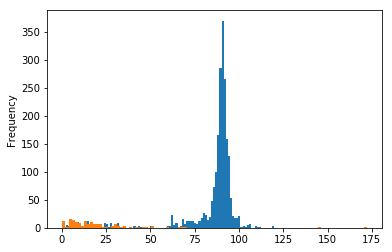

In [117]:
# Pandas features, like selection inside square brackets, are really just Numpy features.

df["mass"][df.Q1 != df.Q2].plot.hist(bins=100)
df["mass"][df.Q1 == df.Q2].plot.hist(bins=100)